#Step 0 - Import the various code libraries

To begin, we import some library modules and functions that we will use.   

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation - see https://keras.io/.
Numpy is a collection of math functions including various matrix operations - see http://www.numpy.org/.   
Matplotlib is a 2D plotting library  - see https://matplotlib.org/.


In [1]:
'''
keras_mnist_sigmoid_val.py

Trains a simple deep NN on the MNIST dataset.
Uses a simple sigmoid activation fucntion and MSE loss. 
Uses a separate validation/tuning set to determine best model.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

# Set the seed value of the random number generator
random_seed = 2
np.random.seed(random_seed)

#print(tf.VERSION)
print(tf.keras.__version__)

print("The enviriment is ready.")

2.8.0
The enviriment is ready.


#Step 1 - Set the learning parameters and load the data.
The data is loaded into three data sets: training, validation and testing.
The validation (or tuning) set is used to ensure the model does not overfit to the training data.

In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_tune = x_train[50000:60000]
x_train = x_train[0:50000]
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_tune = x_tune.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_tune /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_tune.shape[0], 'tune samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_tune  = tf.keras.utils.to_categorical(y_train[50000:60000], num_classes)
y_train = tf.keras.utils.to_categorical(y_train[0:50000], num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)


11501568/11490434 [==============================] - 0s 0us/step
50000 train samples
10000 tune samples
10000 test samples


#Step 2 - Configure the neural network architecture (graph) 
By default the network is similar to the simple back-prop algorithm. 
It has one hidden layer of 512 nodes with sigmoid activation functions.
And it has an output layer of 10 nodes each with a  sigmoid activation function.

We shall see, that this can be changed in several ways to make the network more effective in developing an accuracte model.

In [3]:
model = tf.keras.Sequential()
model.add(layers.Dense(512, activation='sigmoid', input_shape=(784,)))
#model.add(layers.Dense(num_classes, activation='sigmoid'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()    # Produce a summary of the network architecture


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#Step 3 - Compile the model and fit the data to it
The model uses the mean squared error (MSE) loss function, which works well with the sigmoid activation output nodes, and the stochastic gradient descent (SGD) weight update algorithm.
The validation set is used to monitor the model to see if it overfits to the training data.

In [4]:
#model.compile(loss='mean_squared_error',
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9),
#              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_tune, y_tune))


Epoch 1/10
391/391 [==============================] - 4s 4ms/step - loss: 0.4880 - accuracy: 0.8471 - val_loss: 0.2996 - val_accuracy: 0.9107
Epoch 2/10
391/391 [==============================] - 2s 4ms/step - loss: 0.2835 - accuracy: 0.9173 - val_loss: 0.2348 - val_accuracy: 0.9303
Epoch 3/10
391/391 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.9338 - val_loss: 0.1886 - val_accuracy: 0.9492
Epoch 4/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1817 - accuracy: 0.9474 - val_loss: 0.1618 - val_accuracy: 0.9562
Epoch 5/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1524 - accuracy: 0.9553 - val_loss: 0.1369 - val_accuracy: 0.9632
Epoch 6/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1282 - accuracy: 0.9628 - val_loss: 0.1270 - val_accuracy: 0.9650
Epoch 7/10
391/391 [==============================] - 1s 4ms/step - loss: 0.1119 - accuracy: 0.9675 - val_loss: 0.1156 - val_accuracy: 0.9671
Epoch 

#Step 4 - Evaluate the model on the test set and print the results.
Pass the independent test data through the trained model and compute the test MSE  and test classification accuracy.
For the first ten examples in the test set show us the examples and the associated network predictions.

Test loss: 0.09320349991321564
Test accuracy: 0.9703999757766724


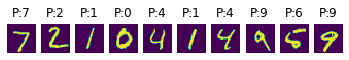

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(x_test, verbose=0)
for i in range(10):
    subplt = plt.subplot(int(i / 10) + 1, 10, i + 1)
    # no sense in showing labels if they don't match the letter
    hot_index = np.argmax(predictions[i])
    subplt.set_title('P:{0}'.format(hot_index))
    subplt.axis('off')
    letter = x_test[i]
    subplt.matshow(np.reshape(letter, [28, 28]))
    plt.draw()
    
plt.show()